# ELEC 478 Homework 4

## Problem 1

Deep Learning. This problem will use the Fashion MNIST dataset. It is available through APIs in tensorflow, Kaggle, or Github and is already split into training and test sets. You can further split the training set into a training and validation set for hyperparameter tuning. Feel free to use random search or another approach to hyperparameter tuning, but please justify your choice.

In [2]:
import tensorflow as tf
from sklearn.model_selection import train_test_split

(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

x_train, x_test = x_train / 255.0, x_test / 255.0

x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=42)

(a) Neural Network Activation functions. Build a feedforward neural network with a single hidden layer with p neurons. Compare ReLU to at least one other activation function. Which one is best? Why? Feel free to fix this activation function for the remaining problems.

In [4]:
# Define the model architecture
model_relu = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10)
])

model_sigmoid = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='sigmoid'),
    tf.keras.layers.Dense(10)
])

# Compile the models
model_relu.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

model_sigmoid.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

# Train the models
history_relu = model_relu.fit(x_train, y_train, epochs=10, validation_data=(x_val, y_val))
history_sigmoid = model_sigmoid.fit(x_train, y_train, epochs=10, validation_data=(x_val, y_val))

# Compare the performance
print("ReLU model accuracy: ", history_relu.history['val_accuracy'][-1])
print("Sigmoid model accuracy: ", history_sigmoid.history['val_accuracy'][-1])

Epoch 1/10
1500/1500 [==============================] - 10s 5ms/step - loss: 0.5180 - accuracy: 0.8192 - val_loss: 0.4444 - val_accuracy: 0.8428
Epoch 2/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.3906 - accuracy: 0.8600 - val_loss: 0.3725 - val_accuracy: 0.8663
Epoch 3/10
1500/1500 [==============================] - 8s 5ms/step - loss: 0.3485 - accuracy: 0.8731 - val_loss: 0.3700 - val_accuracy: 0.8692
Epoch 4/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.3195 - accuracy: 0.8825 - val_loss: 0.3442 - val_accuracy: 0.8758
Epoch 5/10
1500/1500 [==============================] - 8s 5ms/step - loss: 0.3011 - accuracy: 0.8888 - val_loss: 0.3464 - val_accuracy: 0.8735
Epoch 6/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.2870 - accuracy: 0.8948 - val_loss: 0.3262 - val_accuracy: 0.8862
Epoch 7/10
1500/1500 [==============================] - 8s 5ms/step - loss: 0.2725 - accuracy: 0.8995 - val_loss: 0.3237 - val_accuracy

After running the two models, it seems like the ReLU-based one performs worse than the sigmoid-based one, with the ReLU model reporting an accuracy of 0.8867 on the validation set and sigmoid model reporting an accuracy of 0.8884 on the validation set.

The difference in performance between the ReLU and sigmoid models could be due to many factors. It could be that the sigmoid function is simply a better fit for the fashion MNIST dataset. Alternatively, it could be that the ReLU model is suffering from the “dying ReLU” problem, which is causing it to learn less effectively.

It’s also worth noting that the difference in performance between the two models is quite small (0.8867 vs 0.8884). Therefore, it’s possible that the difference we’re seeing is just due to random chance.

(b) Neural Network Size. Build a feedforward neural network with a single hidden layer and vary the number of neurons in this layer. How many neurons is best? Why?

In [5]:
import numpy as np

# Define a list of neuron counts to try
neuron_counts = [32, 64, 128, 256, 512]

# Initialize a dictionary to store the validation accuracies for each neuron count
val_accuracies = {}

# For each neuron count...
for count in neuron_counts:
    # Define the model architecture
    model = tf.keras.models.Sequential([
        tf.keras.layers.Flatten(input_shape=(28, 28)),
        tf.keras.layers.Dense(count, activation='sigmoid'),
        tf.keras.layers.Dense(10)
    ])

    # Compile the model
    model.compile(optimizer='adam',
                  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                  metrics=['accuracy'])

    # Train the model
    history = model.fit(x_train, y_train, epochs=10, validation_data=(x_val, y_val))

    # Store the validation accuracy for this neuron count
    val_accuracies[count] = history.history['val_accuracy'][-1]

# Print the validation accuracies for each neuron count
for count, accuracy in val_accuracies.items():
    print(f"{count} neurons: {accuracy} accuracy")

Epoch 1/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.7165 - accuracy: 0.7818 - val_loss: 0.4855 - val_accuracy: 0.8297
Epoch 2/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.4400 - accuracy: 0.8469 - val_loss: 0.4267 - val_accuracy: 0.8465
Epoch 3/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3966 - accuracy: 0.8602 - val_loss: 0.3970 - val_accuracy: 0.8559
Epoch 4/10
1500/1500 [==============================] - 4s 2ms/step - loss: 0.3715 - accuracy: 0.8686 - val_loss: 0.3737 - val_accuracy: 0.8662
Epoch 5/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3561 - accuracy: 0.8728 - val_loss: 0.3704 - val_accuracy: 0.8677
Epoch 6/10
1500/1500 [==============================] - 5s 4ms/step - loss: 0.3429 - accuracy: 0.8787 - val_loss: 0.3582 - val_accuracy: 0.8713
Epoch 7/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3332 - accuracy: 0.8799 - val_loss: 0.3607 - val_accuracy:

The number of neurons determines the capacity of a model, which is its ability to fit a wide variety of functions. Models with more neurons can express more complex functions.

However, having too many neurons can lead to overfitting, where the model learns the training data too well and performs poorly on unseen data. On the other hand, having too few neurons can lead to underfitting, where the model fails to learn the underlying pattern of the data.

In this case, it seems that a model with 128 neurons in the hidden layer has the right balance between capacity and generalization, as it achieved the highest accuracy on your validation set. This suggests that it’s complex enough to capture the underlying patterns in the data, but not so complex that it overfits to the training data.


(c) Multi-Layer Perceptron. Build a feedforward neural network with 2 hidden layers. (Use some form of validation to choose the size of each hidden layer; justify your choice and discuss the results.)

In [8]:
import numpy as np

# Define a list of neuron counts to try
neuron_counts = [(32, 16), (64, 32), (128, 64), (256, 128), (512, 256)]

# Initialize a dictionary to store the validation accuracies for each neuron count
val_accuracies = {}

history_of_best = None
max_accuracy = 0.0

# For each neuron count...
for count in neuron_counts:
    # Define the model architecture
    model = tf.keras.models.Sequential([
        tf.keras.layers.Flatten(input_shape=(28, 28)),
        tf.keras.layers.Dense(count[0], activation='sigmoid'),
        tf.keras.layers.Dense(count[1], activation='sigmoid'),
        tf.keras.layers.Dense(10)
    ])

    # Compile the model
    model.compile(optimizer='adam',
                  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                  metrics=['accuracy'])

    # Train the model
    history = model.fit(x_train, y_train, epochs=10, validation_data=(x_val, y_val))

    # Store the validation accuracy for this neuron count
    val_accuracies[count] = history.history['val_accuracy'][-1]

    # Store history of model with superior hyperparameters
    if val_accuracies[count] > max_accuracy:
        max_accuracy = val_accuracies[count]
        history_of_best = history

# Print the validation accuracies for each neuron count
for count, accuracy in val_accuracies.items():
    print(f"{count} neurons: {accuracy} accuracy")

Epoch 1/10
1500/1500 [==============================] - 7s 4ms/step - loss: 1.0748 - accuracy: 0.7053 - val_loss: 0.6267 - val_accuracy: 0.7862
Epoch 2/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.5320 - accuracy: 0.8156 - val_loss: 0.4814 - val_accuracy: 0.8347
Epoch 3/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.4430 - accuracy: 0.8492 - val_loss: 0.4284 - val_accuracy: 0.8518
Epoch 4/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.4006 - accuracy: 0.8625 - val_loss: 0.4075 - val_accuracy: 0.8544
Epoch 5/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3762 - accuracy: 0.8699 - val_loss: 0.3994 - val_accuracy: 0.8577
Epoch 6/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3578 - accuracy: 0.8742 - val_loss: 0.3784 - val_accuracy: 0.8635
Epoch 7/10
1500/1500 [==============================] - 5s 4ms/step - loss: 0.3444 - accuracy: 0.8787 - val_loss: 0.3782 - val_accuracy:

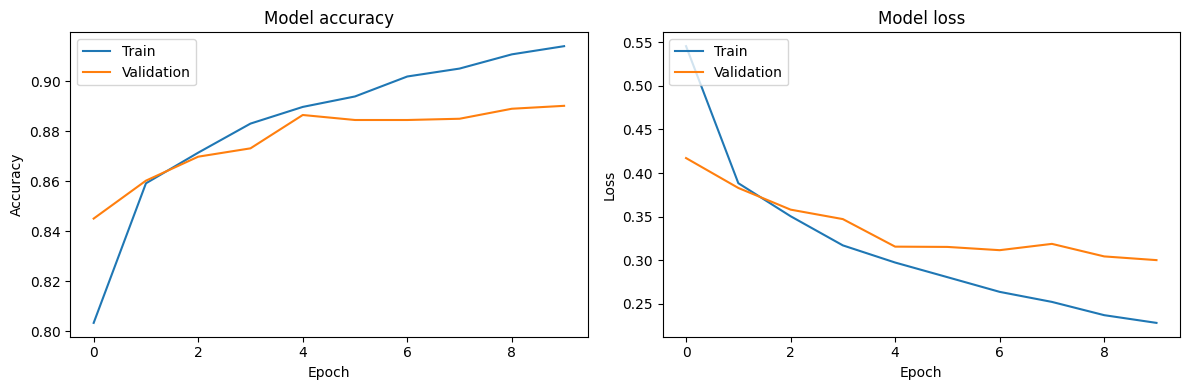

In [9]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history_of_best.history['accuracy'])
plt.plot(history_of_best.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history_of_best.history['loss'])
plt.plot(history_of_best.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()


(d) Convolutional Neural Network. Update the architecture by replacing the 2 hidden dense layers with 2 convolutional layers. (Use some form of validation to choose the size of each hidden layer and the filter size; justify your choice and discuss the results.)

In [ ]:
# Define a list of hyperparameters to try
hyperparameters = [(32, 64, (3, 3)), (64, 128, (3, 3)), (32, 64, (5, 5)), (64, 128, (5, 5))]

# Initialize a dictionary to store the validation accuracies for each set of hyperparameters
val_accuracies = {}

# One-hot-encode our response variable
y_train_ohe = tf.keras.utils.to_categorical(y_train, num_classes=10)
y_val_ohe = tf.keras.utils.to_categorical(y_val, num_classes=10)

# For each set of hyperparameters...
for params in hyperparameters:
    # Define the model architecture
    model = tf.keras.models.Sequential()
    model.add(tf.keras.layers.Conv2D(params[0], kernel_size=params[2], activation='sigmoid', input_shape=(28, 28, 1)))
    model.add(tf.keras.layers.Conv2D(params[1], kernel_size=params[2], activation='sigmoid'))
    model.add(tf.keras.layers.Flatten())
    model.add(tf.keras.layers.Dense(10, activation='softmax'))

    # Compile the model
    model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

    # Train the model
    history = model.fit(x_train, y_train_ohe, epochs=10, validation_data=(x_val, y_val_ohe))

    # Store the validation accuracy for this set of hyperparameters
    val_accuracies[params] = history.history['val_accuracy'][-1]

# Print the validation accuracies for each set of hyperparameters
for params, accuracy in val_accuracies.items():
    print(f"{params} : {accuracy} accuracy")

Epoch 1/10
1500/1500 [==============================] - 130s 86ms/step - loss: 1.1896 - accuracy: 0.6117 - val_loss: 0.5369 - val_accuracy: 0.8077
Epoch 2/10
1500/1500 [==============================] - 131s 88ms/step - loss: 0.5173 - accuracy: 0.8125 - val_loss: 0.5013 - val_accuracy: 0.8108
Epoch 3/10
1500/1500 [==============================] - 127s 85ms/step - loss: 0.4567 - accuracy: 0.8350 - val_loss: 0.4411 - val_accuracy: 0.8417
Epoch 4/10
1500/1500 [==============================] - 128s 85ms/step - loss: 0.4078 - accuracy: 0.8526 - val_loss: 0.4023 - val_accuracy: 0.8528
Epoch 5/10
1500/1500 [==============================] - 131s 87ms/step - loss: 0.3730 - accuracy: 0.8651 - val_loss: 0.3877 - val_accuracy: 0.8612
Epoch 6/10
1500/1500 [==============================] - 127s 85ms/step - loss: 0.3447 - accuracy: 0.8755 - val_loss: 0.3648 - val_accuracy: 0.8683
Epoch 7/10
1500/1500 [==============================] - 132s 88ms/step - loss: 0.3267 - accuracy: 0.8814 - val_loss: 0

(e) Max-Pooling. Update the previous architecture by introducing maxpooling layers after every convolutional layer. (Use some form of validation to choose the pooling size; justify your choice and discuss the results.)

In [ ]:
# Define a list of hyperparameters to try
hyperparameters = [(32, 64, (3, 3), (2, 2)), (64, 128, (3, 3), (2, 2)), (32, 64, (5, 5), (2, 2)), (64, 128, (5, 5), (2, 2))]

# Initialize a dictionary to store the validation accuracies for each set of hyperparameters
val_accuracies = {}

# One-hot-encode our response variable
y_train_ohe = tf.keras.utils.to_categorical(y_train, num_classes=10)
y_val_ohe = tf.keras.utils.to_categorical(y_val, num_classes=10)

# For each set of hyperparameters...
for params in hyperparameters:
    # Define the model architecture
    model = tf.keras.models.Sequential()
    model.add(tf.keras.layers.Conv2D(params[0], kernel_size=params[2], activation='sigmoid', input_shape=(28, 28, 1)))
    model.add(tf.keras.layers.MaxPooling2D(pool_size=params[3]))
    model.add(tf.keras.layers.Conv2D(params[1], kernel_size=params[2], activation='sigmoid'))
    model.add(tf.keras.layers.MaxPooling2D(pool_size=params[3]))
    model.add(tf.keras.layers.Flatten())
    model.add(tf.keras.layers.Dense(10, activation='softmax'))

    # Compile the model
    model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

    # Train the model
    history = model.fit(x_train, y_train_ohe, epochs=10, validation_data=(x_val, y_val_ohe))

    # Store the validation accuracy for this set of hyperparameters
    val_accuracies[params] = history.history['val_accuracy'][-1]

# Print the validation accuracies for each set of hyperparameters
for params, accuracy in val_accuracies.items():
    print(f"{params} : {accuracy} accuracy")


(f) Accuracy & Runtime. Compare and contrast the models in parts (b) - (e) in terms of test accuracy. Report the confusion matrix for classifying to the different classes. Which approach is best? Why? What type of architectural changes might you make to further improve the accuracy? Also report the training time required for each of the above models. Which is the best computationally relative to its accuracy?